# SBU CSE 352 - HW 1 -  Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

---

All student names in group: [Acero Liang Li, Qijie Wu, Mayukh Banik]

I understand that my submission needs to be my own group's work: [ALL, QW, MB]

I understand that ChatGPT / Copilot / other AI tools are not allowed: [ALL, QW, MB]

## Instructions

Total Points: 100

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Only use standard packages (numpy, scipy, and built-in packages like random). Submit the completely rendered notebook as a HTML file.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [170]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [171]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'west'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`.

In [172]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [173]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: south
step 1 - action: north
step 2 - action: suck
step 3 - action: east
step 4 - action: south
step 5 - action: suck
step 6 - action: west
step 7 - action: suck
step 8 - action: north
step 9 - action: west
step 10 - action: north
step 11 - action: suck
step 12 - action: west
step 13 - action: north
step 14 - action: east
step 15 - action: east
step 16 - action: south
step 17 - action: east
step 18 - action: north
step 19 - action: suck


5

# Tasks

## General [10 Points]

1. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design, for example. If it makes your code more simple objects are okay, but try to keep the code as simple as possible.
2. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
3. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

## Implementation details 
#### simulation_environment: creates a simulation environment 
- environment is [5 x 5] array. Each cell is 0 if clean, 1 if dirty

In [174]:
## show_environment: prints the environment given environment and agent location
# 'd' indicates dirty, 'A' indicates rover location 
def show_environment(environment, agent_pos):
    content = ""
    for row in range(len(environment)):
        for column in range(len(environment[row])):
            if(environment[row][column] == 1 and (agent_pos[0] == row and agent_pos[1] == column)):
                content = "dA"
            elif(environment[row][column] == 1):
                content = "d "
            elif(agent_pos[0] == row and agent_pos[1] == column):
                content = " A"
            else:
                content = "  "
            print("|" + content, end="")
        print("|")


In [175]:
# Your code and description goes here
import numpy as np
from random import randint

## simulation_environment: creates a simulation environment, returns the number of steps taken and the number of cleaned 
def simulation_environment(agent, max_steps, dimensions, verbose=True):
    num_cleaned = 0     # performance metric  
    num_dirty = 0 # the number of 'dirty' squares in the environment 
    environment = np.zeros((dimensions, dimensions), dtype=int)  # create an environment
    agent_pos = [randint(0, dimensions - 1), randint(0, dimensions - 1)] # agent position (x, y) (give agent random start pos)

    # randomly populate environment with dirt with p = 2
    rng = np.random.default_rng()
    p = 0.2
    for row in range(len(environment)):
        for column in range(len(environment[row])):
            if rng.random() < p:
                environment[row][column] = 1
                num_dirty += 1
    # instantiate with irrelevant values 
    bumpers = bumpers = {"north" : False, "east" : False, "south" : False, "west" : False}
    isDirty = False
    steps = 0
    while steps < max_steps and num_dirty != 0:
        bumpers["west"] = True if agent_pos[1] == 0 else False
        bumpers["east"] = True if agent_pos[1] == dimensions - 1 else False
        bumpers["north"] = True if agent_pos[0] == 0 else False
        bumpers["south"] = True if agent_pos[0] == dimensions - 1 else False

        isDirty = True if environment[agent_pos[0]][agent_pos[1]] == 1 else False
        action = agent.action(bumpers, isDirty)
        if(verbose):
            print("state:")
            show_environment(environment, agent_pos)
            print("step", steps, "- action:", action)
        #update environment and agent based on action
        if(action == "suck" and isDirty):
            environment[agent_pos[0]][agent_pos[1]] = 0
            num_cleaned += 1
            num_dirty -= 1
        elif(action == "west" and agent_pos[1] != 0):
            agent_pos[1] -= 1
        elif(action == "east" and agent_pos[1] != dimensions - 1):
            agent_pos[1] += 1 
        elif(action == "north" and agent_pos[0] != 0):
            agent_pos[0] -= 1
        elif(action == "south" and agent_pos[0] != dimensions - 1):
            agent_pos[0] += 1
        steps += 1
    # print final state 
    if(verbose): 
        print("final state:")
        show_environment(environment, agent_pos)
    return (steps, num_cleaned) # steps taken, cleaned 


In [176]:
## Wrap simple_randomized_agent in a class so it works in our environment

class Simple_Randomized_Agent():
    def action(self, bumpers, dirty):
        return simple_randomized_agent(bumpers, dirty)

simulation_environment(Simple_Randomized_Agent(), 100000, 10, verbose=True)

state:
|  |  |d |  |  |  |d |  |  |  |
|  |  |  |d |  |d |  |  |  |  |
|  |  |  |  |  |d |d |  |d |d |
|  |d |  |d |d |d |  |  |  |d |
|d |  |  |  |  |d |  |  |  |  |
|  |  |  |  |  |d |  |  |  |  |
|  |  |d |  |  |  |  |  |  |  |
|  |  |  |  | A|d |  |  |  |  |
|  |  |  |  |  |  |  |  |  |d |
|  |  |  |  |  |  |  |  |  |  |
step 0 - action: west
state:
|  |  |d |  |  |  |d |  |  |  |
|  |  |  |d |  |d |  |  |  |  |
|  |  |  |  |  |d |d |  |d |d |
|  |d |  |d |d |d |  |  |  |d |
|d |  |  |  |  |d |  |  |  |  |
|  |  |  |  |  |d |  |  |  |  |
|  |  |d |  |  |  |  |  |  |  |
|  |  |  | A|  |d |  |  |  |  |
|  |  |  |  |  |  |  |  |  |d |
|  |  |  |  |  |  |  |  |  |  |
step 1 - action: north
state:
|  |  |d |  |  |  |d |  |  |  |
|  |  |  |d |  |d |  |  |  |  |
|  |  |  |  |  |d |d |  |d |d |
|  |d |  |d |d |d |  |  |  |d |
|d |  |  |  |  |d |  |  |  |  |
|  |  |  |  |  |d |  |  |  |  |
|  |  |d | A|  |  |  |  |  |  |
|  |  |  |  |  |d |  |  |  |  |
|  |  |  |  |  |  |  |  |  |d |
|  |  

(4459, 19)

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [177]:
# Your code and description goes here
# Simple_Reflex_Agent: defines a simple reflex agent 

class Simple_Reflex_Agent():
    def action(self, bumpers, isDirty):
        if isDirty: return "suck"
        move_actions = ["north", "east", "west", "south"]
        move_actions = [action for action in move_actions if not (bumpers.get(action, False))]
        return np.random.choice(move_actions)


simulation_environment(Simple_Reflex_Agent(), 10, 5, verbose=True)

state:
|  |  |  |  |  |
|d |  |d |  |  |
|  |  | A|  |  |
|  |  |  |  |  |
|d |  |  |d |  |
step 0 - action: east
state:
|  |  |  |  |  |
|d |  |d |  |  |
|  |  |  | A|  |
|  |  |  |  |  |
|d |  |  |d |  |
step 1 - action: west
state:
|  |  |  |  |  |
|d |  |d |  |  |
|  |  | A|  |  |
|  |  |  |  |  |
|d |  |  |d |  |
step 2 - action: east
state:
|  |  |  |  |  |
|d |  |d |  |  |
|  |  |  | A|  |
|  |  |  |  |  |
|d |  |  |d |  |
step 3 - action: south
state:
|  |  |  |  |  |
|d |  |d |  |  |
|  |  |  |  |  |
|  |  |  | A|  |
|d |  |  |d |  |
step 4 - action: west
state:
|  |  |  |  |  |
|d |  |d |  |  |
|  |  |  |  |  |
|  |  | A|  |  |
|d |  |  |d |  |
step 5 - action: west
state:
|  |  |  |  |  |
|d |  |d |  |  |
|  |  |  |  |  |
|  | A|  |  |  |
|d |  |  |d |  |
step 6 - action: west
state:
|  |  |  |  |  |
|d |  |d |  |  |
|  |  |  |  |  |
| A|  |  |  |  |
|d |  |  |d |  |
step 7 - action: east
state:
|  |  |  |  |  |
|d |  |d |  |  |
|  |  |  |  |  |
|  | A|  |  |  |
|d |  |  |d 

(10, 0)

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

## Implementation details:
My model-based reflex agent will first find the northwest corner, and it will do this by going north and west, until it can no longer keep going in those directions. This would put it in position (0, 0) and it will move horizontally, east or west, until it cannot keep going in that direction anymore. That indicates that it has cleaned an entire row, in which it will go south and repeat the process. This is done until it can no longer go south, which indicates that all spots have been cleaned.

## Agent state
The agent will keep track of two states. The first is a boolean, `found_start_pt`, which tells the agent if it's executing the algorithmn to find the starting point, or if it has already found the starting point in the past, in which it should be doing the cleaning algorithmn. The second is `cur_dir`, a string, one of `east`, `west`, or `north`. This is the current direction in which the agent is moving, and it will not change its direction until it reaches a boundary. In the finding starting point stage, direction will be `north`, until it becomes `west`. In the cleaning stage, it will move `east`, until it can't any more, then change to `west`, and so on. 

In [178]:
# Your code goes here
# Model_Reflex_Agent: defines a model-based reflex agent

class Model_Reflex_Agent():
    def __init__(self):
        self.found_start_pt = False
        self.cur_dir = "north" 

    def action(self, bumpers, isDirty):
        if not self.found_start_pt:
            # look for start unless dirty
            if isDirty: return "suck"
            if self.cur_dir == "north":
                if not bumpers[self.cur_dir]: return self.cur_dir # can keep going north
                else:
                    self.cur_dir = "west" # can't keep going north
            
            if self.cur_dir == "west":
                if not bumpers[self.cur_dir] : return "west"
                else:
                    self.found_start_pt = True # we found start
                    self.cur_dir = "east"
                    return self.cur_dir
        else:
            # found the start point, return current direction unless obstructed or suck if dirty
            if(isDirty):
                return "suck"
            if bumpers[self.cur_dir]:
                # obstructed, change direction and go south
                if self.cur_dir == "east":
                    self.cur_dir = "west"
                    return "south"
                elif(self.cur_dir == "west"):
                    self.cur_dir = "east"
                    return "south"
            return self.cur_dir

                


simulation_environment(Model_Reflex_Agent(), 100, 5, verbose=True)

state:
|  |d | A|  |  |
|  |  |d |d |  |
|  |  |  |  |  |
|  |  |d |  |  |
|  |d |  |  |  |
step 0 - action: west
state:
|  |dA|  |  |  |
|  |  |d |d |  |
|  |  |  |  |  |
|  |  |d |  |  |
|  |d |  |  |  |
step 1 - action: suck
state:
|  | A|  |  |  |
|  |  |d |d |  |
|  |  |  |  |  |
|  |  |d |  |  |
|  |d |  |  |  |
step 2 - action: west
state:
| A|  |  |  |  |
|  |  |d |d |  |
|  |  |  |  |  |
|  |  |d |  |  |
|  |d |  |  |  |
step 3 - action: east
state:
|  | A|  |  |  |
|  |  |d |d |  |
|  |  |  |  |  |
|  |  |d |  |  |
|  |d |  |  |  |
step 4 - action: east
state:
|  |  | A|  |  |
|  |  |d |d |  |
|  |  |  |  |  |
|  |  |d |  |  |
|  |d |  |  |  |
step 5 - action: east
state:
|  |  |  | A|  |
|  |  |d |d |  |
|  |  |  |  |  |
|  |  |d |  |  |
|  |d |  |  |  |
step 6 - action: east
state:
|  |  |  |  | A|
|  |  |d |d |  |
|  |  |  |  |  |
|  |  |d |  |  |
|  |d |  |  |  |
step 7 - action: south
state:
|  |  |  |  |  |
|  |  |d |d | A|
|  |  |  |  |  |
|  |  |d |  |  |
|  |d |  |  

(28, 5)

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each with 100000 max steps. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [179]:
# Your code goes here

env_dims = [5, 10, 100]
model_names = ['simple randomized agent', 'simple reflex agent', 'model-based reflex agent']

for model_type in range(3): 
    for env_size in env_dims:
        total_steps = 0
        for run in range(100):
            if(model_type == 0): model = Simple_Randomized_Agent()
            elif(model_type == 1): model = Simple_Reflex_Agent()
            else: model = Model_Reflex_Agent()
            # create env
            total_steps += simulation_environment(model, 100000, env_size, verbose=False)[0]
        average_performance = total_steps / 100
        print(f"Model: {model_names[model_type]}, Environment Size: {env_size}, Average Performance: {average_performance}")

Model: simple randomized agent, Environment Size: 5, Average Performance: 461.93
Model: simple randomized agent, Environment Size: 10, Average Performance: 3016.62
Model: simple randomized agent, Environment Size: 100, Average Performance: 100000.0
Model: simple reflex agent, Environment Size: 5, Average Performance: 112.68
Model: simple reflex agent, Environment Size: 10, Average Performance: 841.6
Model: simple reflex agent, Environment Size: 100, Average Performance: 100000.0
Model: model-based reflex agent, Environment Size: 5, Average Performance: 28.75
Model: model-based reflex agent, Environment Size: 10, Average Performance: 124.38
Model: model-based reflex agent, Environment Size: 100, Average Performance: 12097.94


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     |461.93|112.68|28.75|
| 10x10   |3016.62|841.6|124.38|
| 100x100 |100000|100000|12097.94|

Add charts to compare the performance of the different agents.

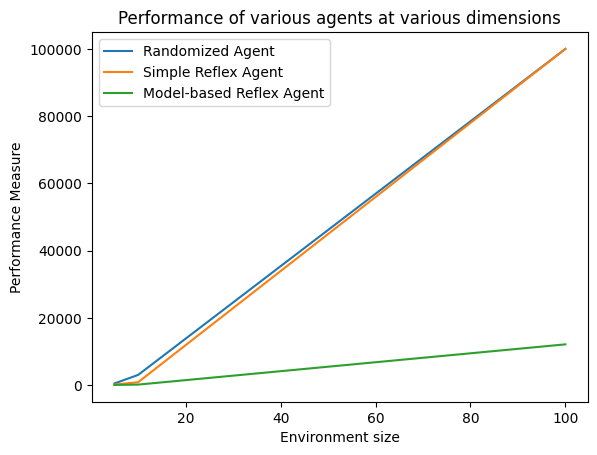

In [1]:
# Your graphs and discussion of the results goes here
import matplotlib.pyplot as plt
# x is dimensions, y is performance output (steps)
def plot_results():
    x_random_agent = [5, 10, 100]
    x_random_agent_performance = [461.93, 3016.62, 100000]

    x_simple_reflex_agent = [5, 10, 100]
    x_simple_reflex_agent_performance = [112.68, 841.6, 100000]

    x_model_based_reflex_agent = [5, 10, 100]
    x_model_based_reflex_agent_performance = [28.75, 124.38, 12097.94]

    plt.plot(x_random_agent, x_random_agent_performance, label="Randomized Agent")
    plt.plot(x_simple_reflex_agent, x_simple_reflex_agent_performance, label="Simple Reflex Agent")
    plt.plot(x_model_based_reflex_agent, x_model_based_reflex_agent_performance, label="Model-based Reflex Agent")
    plt.xlabel("Environment size")
    plt.ylabel("Performance Measure")
    plt.title('Performance of various agents at various dimensions')
    plt.legend()
    plt.show()

plot_results()

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

## Answer: Robustness of Agent implementations 

### Simple Randomized Agent
This is the agent given to us as an example. This agent is not very robust for the reasons that it will take an increasingly long time to clean a room that isn't of small dimensions.
    - If put into a rectangular room with unknown size, it will clean the entire room given a long enough time and energy. But this will be very inefficient and take a very long time.
    - If the cleaning area has an irregular shape, it will still clean the entire area. But again, this will be inefficient and take a very long time and a lot of energy.
    - If the room contains obstacles, it will still clean the entire area, but just take a very long time.

### Simple Reflex Agent
In my implementation of this agent, the agent will choose a random direction as long as its valid (meaning the bumpers tell you there is no obstacle / wall). Also, if the spot is dirty, then it will always suck. From the plot and data, its obviously more efficient than the simple randomized agent, with the difference in efficiencies being greatest at low dimensions and becoming less as the dimensions increase.
    - If put into a rectangular room with unknown size, it will clean the entire room given a long enough time and energy. It will be more efficient than the simple randomized agent, but still perform non-ideal actions.
    - If the cleaning area has an irregular shape, it will still clean the entire area. It will do it more efficiently than the simple randomized agent, but still make non-ideal actions.
    - If the room contains obstacles, it will still clean the entire area, but not efficiently.

### Model Based Agent
In my implementation of this agent, the agent finds the northwest corner of the room. Then, it will clean the room, row by row, until it can no longer go south. It is far more efficient than the previous randomized and reflex agents, but it loses in robustness because full cleaning of the room can be guaranteed only if the room is rectangular.
    - If put into a rectangular room with unknown size, it will clean the entire room in an efficient manner. Its implementation doesn't need to know the size of the room. However, finding the northwest corner does mean that if the agent starts away from the corner, it will cross over some spots at least twice. 
    - If the cleaning area has an irregular shape, then it may not clean the entire area. This is because it will only go south after encountering a boundary on the east or west side. If the room has a boundary south next to the east and west side boundaries (like a corner), then it will get stuck and never leave that "row".
    - If the room contains obstacles, it may not clean the entire area. Like before, it only goes south after encountering a boundary on the east or west side. That means if there is an obstacle in the middle of a given "row", then it will go south and clean the next row before the original row is fully cleaned. 




---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.
